## Task 03 – Customer Universe: Customer Segmentation using K-Means

In this project, I segmented customers into groups based on their annual income and spending behavior. This helps identify customer patterns and can support better marketing strategies.The clustering is done using K-Means, an unsupervised machine learning algorithm.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [23]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


In [25]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [26]:
wcss=[]
for k in range(1,11):
    kmeans_model=KMeans(n_clusters=k,random_state=42)
    kmeans_model.fit(X)
    wcss.append(kmeans_model.inertia_)

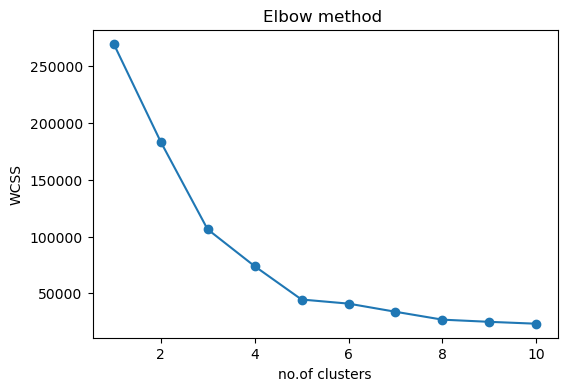

In [27]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11),wcss,marker='o')
plt.title("Elbow method ")
plt.xlabel("no.of clusters")
plt.ylabel("WCSS")
plt.show()

In [28]:
kmeans=KMeans(n_clusters=5,random_state=42)
df["Cluster"] =kmeans.fit_predict(X)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


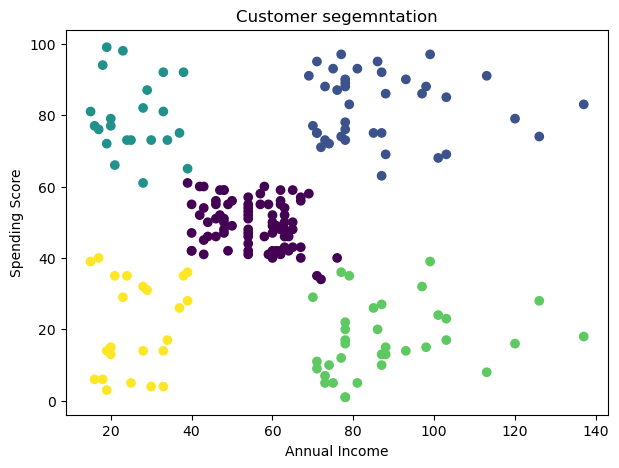

In [29]:
plt.figure(figsize=(7,5))
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=df["Cluster"])
plt.title("Customer segemntation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [30]:
centers =kmeans.cluster_centers_
centers

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

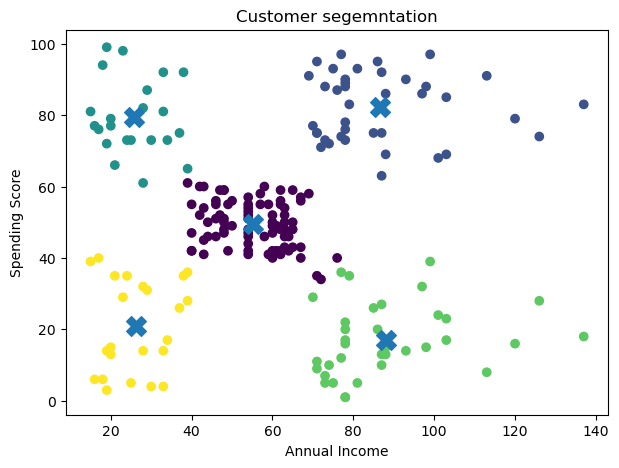

In [31]:
plt.figure(figsize=(7,5))
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=df["Cluster"])
plt.scatter(centers[:,0],centers[:,1],marker="X",s=200)
plt.title("Customer segemntation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

## Conclusion

This project grouped customers into 5 clusters using K-Means clustering.
Each cluster represents customers with similar income and spending patterns.
This can help businesses target different customer segments with personalized strategies.
